# Titanic Kaggle 문제 접근방법 요약

In [1]:
# 예측해야하는 생존여부(문제의 목적)를 기준으로 
# 1. 독립변수(feature)와 목적(생존;종속변수)간의 상호 데이타 비교하여,
#  독립변수의 상대적 의미를 파악하는 것이 머신러닝 문제 접근의 첫걸음  
# (ex) 생존자,사망자 합계를 sex(2카테고리), Pclass(3카테고리),embarked(3카테고리),   
#      name에서 title(mr.miss.mrs.) 등 이를 기준으로 생존여부를 비교하여 유의미성을 검토함.  
# 2. 유의미성이 있다고 판단되면, feature engineering으로  NaN 값을 평균값으로 채우기 함.
# 3. 숫자가 아닌 데이타들은 모두 숫자화 시킴(feature engineering) : feature vector화
# 4. 불필요 feature는 drop 하고 유의미한 feature만 남기기
# 5. 최종적으로 모델링 적용하여 결과 예측값 높이기 
''' 
<< 5단계 간단 요약 >>
1. import, 불러오기, 확인, 분석 
2. train,test 데이터 합치기, 데이터 가공, feature engineering(na 없애기), 문자열 숫자화, X,y 데이터 분리 
3. 모델 디자인, 컴파일 설정
4. 모델 훈련
5. 예측 함수 정의
'''

' \n<< 5단계 간단 요약 >>\n1. import, 불러오기, 확인, 분석 \n2. train,test 데이터 합치기, 데이터 가공, feature engineering(na 없애기), 문자열 숫자화, X,y 데이터 분리 \n3. 모델 디자인, 컴파일 설정\n4. 모델 훈련\n5. 예측 함수 정의\n'

### 1. 데이터 불러오기

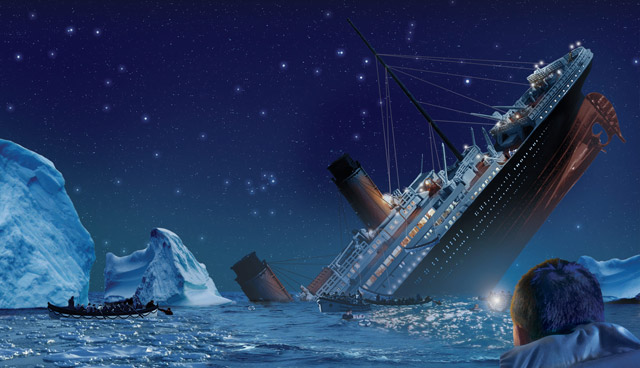

In [2]:
import pandas as pd
import numpy as np
from IPython.display import Image
Image(filename="titanic-disaster.jpg") # ,       width=1200, height=600)

In [3]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#### 1.1 데이터 확인/분석

In [4]:
train.shape, test.shape

((891, 12), (418, 11))

In [5]:
train.iloc[:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [6]:
test.iloc[:2]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


- test 데이터에는 Survived 컬럼이 없으며, \
   제출할 데이터 submission.csv는 예측모델을 이용하여 test 데이터의 Id에 Survived를 붙여 제출하는것이 과제임.
- 목표 : Survived 예측값 구하기

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
sample = pd.read_csv("gender_submission.csv")

In [9]:
sample.iloc[:3]

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


In [10]:
train.iloc[:3] # train.iloc[-1:] #, train.iloc[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [12]:
def bar_chart(feature):        # dead,survived 구분을 0,1로 함.
    survived = train[train['Survived']==1][feature].value_counts()  # feature값을 카운트 하여 survived에 저장
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

- (1),(2)train DataFrame에서 Survived가 1 또는 dead 0 인 행만 선택합니다.
- (1),(2)선택된 행들 중에서 feature 열의 값을 세어 survived 변수에 저장합니다.
- (3) survived와 dead 시리즈를 DataFrame으로 변환합니다.
- (4) index를 'Survived'와 'Dead'로 설정하여 각 행이 생존자와 사망자를 나타내도록 합니다.
- (5) kind='bar'는 막대 그래프를 생성합니다.
- (5) stacked=True는 생존자와 사망자의 값을 쌓아서 하나의 막대로 표현합니다.
- (5) figsize=(10,5)는 그래프의 크기를 설정합니다.   (예시는 아래에 bar_chart('Sex'))

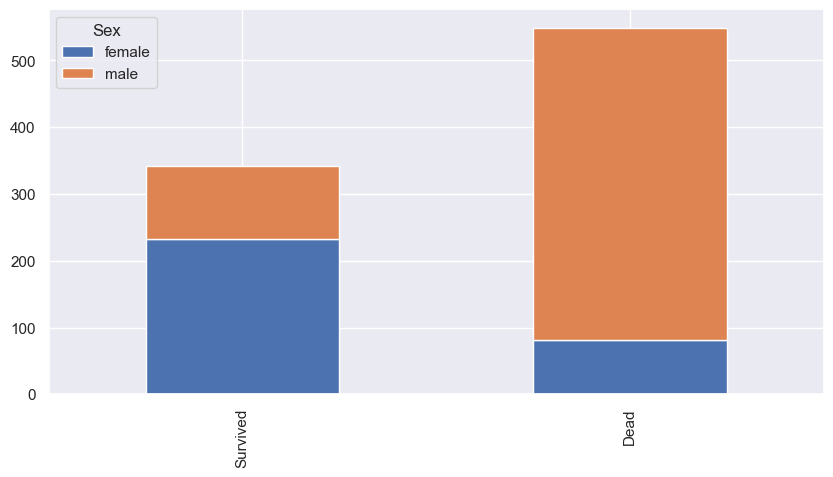

In [13]:
bar_chart('Sex')

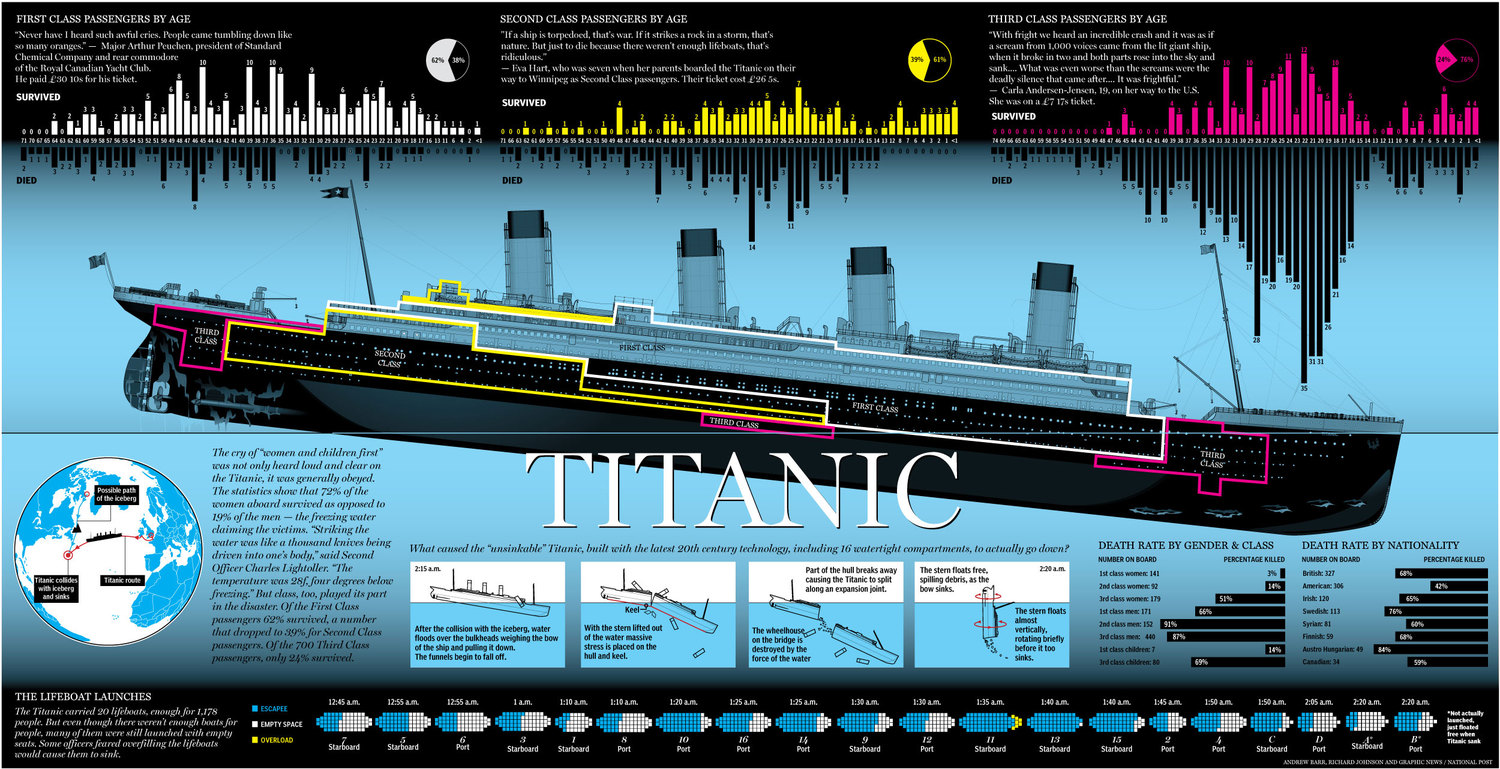

In [14]:
Image(filename = "TItanic-Survival-Infographic.jpg",
      width=1100,height=600)

### 2. Feature Engineering
- train, test 데이터 합치기 

In [15]:
train_test_data = [train, test] # combining train and test dataset

#### 2.1 Title(호칭) 분석/가공 
- 컬럼(Title) 데이터 분리

In [16]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [17]:
dataset.iloc[:2]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs


- .str.extract(' ([A-Za-z]+)\.', expand=False)는 정규 표현식을 사용하여 이름에서 호칭을 추출합니다.
- ([A-Za-z]+)\.: 정규 표현식에서 ([A-Za-z]+)\.은 공백 후 대소문자 알파벳 과 마침표(.)까지 포함하여 추출합니다.
- expand=False는 결과를 데이터프레임이 아닌 시리즈로 반환합니다.
- 예시 : Wilkes, Mrs. James (Ellen Needs)Myles, Mr. Thomas Francis, Oliva y Ocana, Dona. Fermina

In [18]:
train['Title'].value_counts()  # name에 붙은 호칭(title)을 분리하여 사용

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [19]:
test['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

- Title 별 구분의미를 위한 숫자화(차지하는 인원수 비율로 구분)

In [20]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

"Mr": 0, "Miss": 1, "Mrs": 2 .... 240명, 78명, 72명으로 구분 의미 부여 \
그외 Title 인원수는 Mater포함 전부 합해서 28명임으로 하나의 숫자 3으로 동일 카테고리내에 분류함.\
"Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,\
"Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3

In [21]:
dataset.iloc[:2]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2


In [22]:
train.iloc[:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2


In [23]:
test.iloc[:2]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2


- Title(호칭)별 생존(Survived) 분석

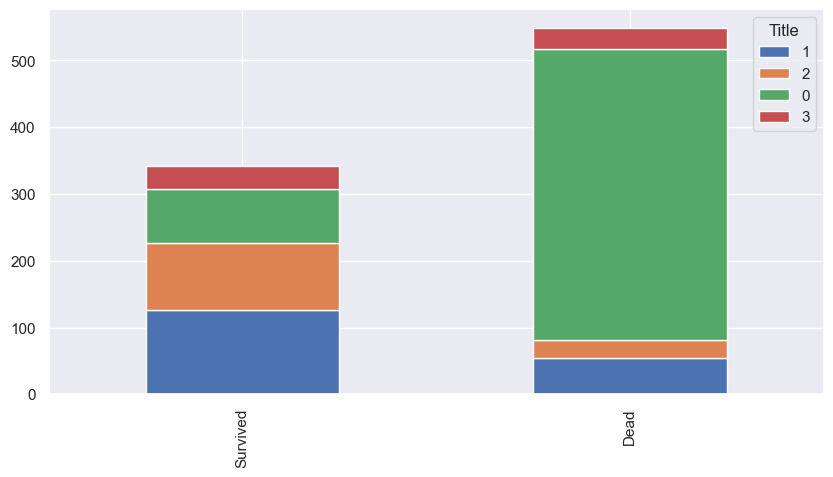

In [24]:
bar_chart('Title')

#### 2.1 (계속) Title 데이터 가공
- Title에서 의미있는 생존 여부를 분리해 냈기에, 더이상 Name 이라는 컬럼은 필요없어짐.
- 컬럼 삭제

In [25]:
train.drop('Name', axis=1, inplace=True) 
test.drop('Name', axis=1, inplace=True)

In [26]:
train.iloc[:2]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2


In [27]:
test.iloc[:2]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2


In [28]:
dataset.iloc[:2]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2


#### 2.2 Sex 분석 및 가공 : Feature Engineering 
- 'Sex' 기준 생존여부 분석과 숫자화(Vector화)

In [29]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

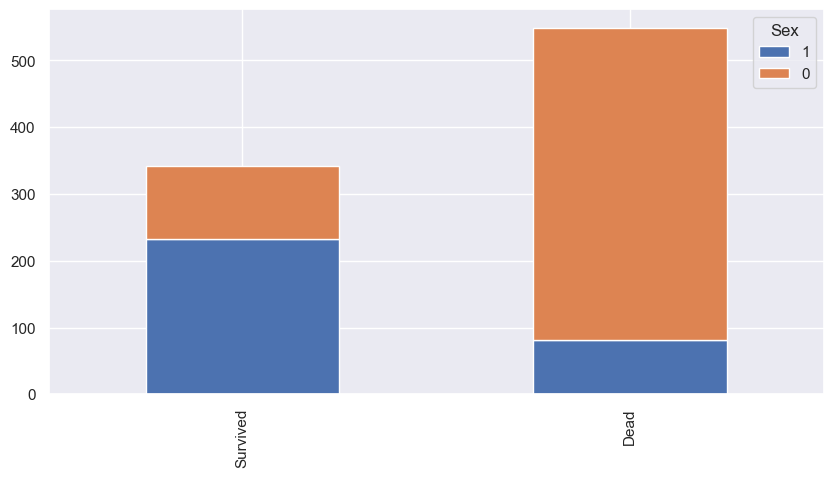

In [30]:
bar_chart('Sex')

#### 2.3 Age 분석 및 가공
- Feature Vector화 : 불필요함. age는 원래 숫자임.
- na 값은 확인후 삭제 필요

In [31]:
train.iloc[:10]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


In [32]:
test.iloc[:2]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2


- 6번줄에 NaN(Not a Name) 발견.. .더 있을거로 예상함.

In [33]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

- missing age data에 Title별(총 4개로 구분) 평균 나이를 구하여 채우기 
- Mr/Miss/Mrs/Others.....
- fill missing age with median age for each title (Mr, Miss, Mrs, Others)

In [34]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

C:\Users\tedy0\AppData\Local\Temp\ipykernel_19580\1046323306.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
C:\Users\tedy0\AppData\Local\Temp\ipykernel_19580\1046323306.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

- Title 컬럼 기준으로 해당값 0,1,2,3 그룹으로 분류하고, 
- 각 그룹별 Age컬럼의 값들의 평균(mean)을 구하고, 
- Age중 NaN 이 있으면 각 그룹별 평균값으로 대신 채운다.

In [35]:
# train.iloc[:]
train.isna().sum()
# train.groupby("Title")["Age"]/.transform("median")

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

- Age 값에 Na값이 더이상 없음

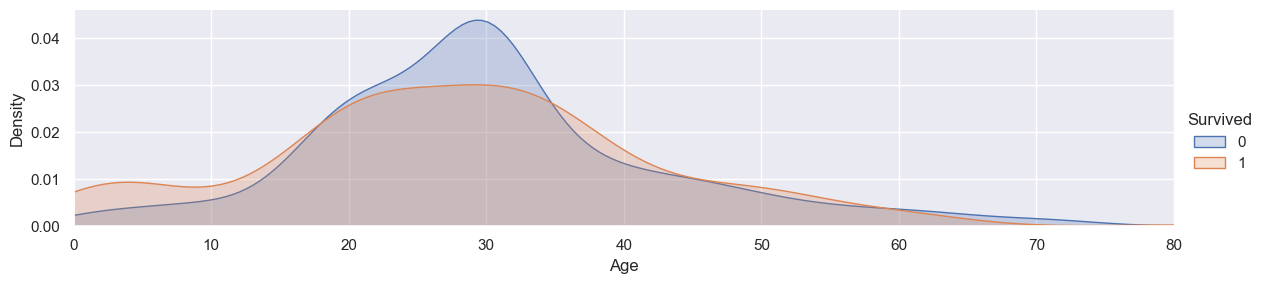

In [36]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill=True)     # ,shade= True : 더이상 안쓰고 fill로 대체됨
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.show() 

- sns.FacetGrid(train, hue="Survived", aspect=4) \
: train 데이터셋을 기반으로 Survived 변수를 휴(hue)로 사용하여 FacetGrid 객체를 생성 \
: 휴(hue)는 데이터 포인트를 그룹화하고 색상으로 구분하는 데 사용되는 변수 \
: hue="Survived" 옵션을 사용하면 생존자와 사망자 그룹별 밀도 분포 그래프가 생성 \
  따라서 각 그룹의 나이 분포를 비교하여 생존 여부와 나이 간의 관계를 살펴볼 수 있음 \
: aspect=4는 그래프의 가로 세로 비율을 4:1로 설정
- facet.map(sns.kdeplot, 'Age', fill=True) \
: 밀도 분포 그래프를 Age 기준으로 생성 \
: fill=True 옵션은 밀도 분포 영역을 채운다는 의미
- facet.set(xlim=(0, train['Age'].max())) \
: x축 범위를 0부터 train['Age']의 최대값까지 설정

(0.0, 20.0)

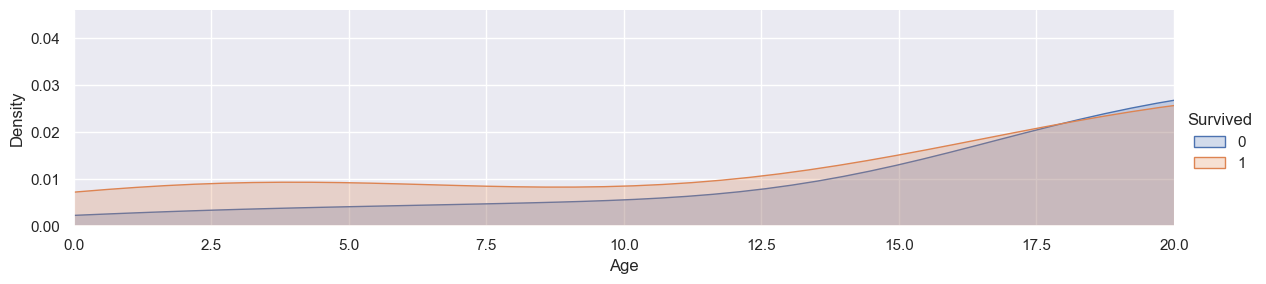

In [37]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

- 20세 이하 생존 여부를 상세히 비교하기위해 plt.xlim(0, 20) 사용

- 나이대별 구분 작업 : 아동(16이하)=0 , 청년(17~26)=1, 성인(27~36)=2, 장년(37~62)=3, 노년(63~)=4  

In [38]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [39]:
train.iloc[:3]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


In [40]:
test.iloc[:3]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,3.0,0,0,240276,9.6875,NaN,Q,0


In [41]:
dataset.iloc[:3]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,3.0,0,0,240276,9.6875,NaN,Q,0


- Age가 카테고리 구분값으로 변경됨을 확인

#### 2.4 Embarked 분석 및 가공
- 선착장(Embarked)이 어딘지에 따라 생존여부를 분석함
- 선착장과 승객등급(Pclass)간의 상관관계 분석도 진행  
- 승객등급 1등급, 2등급, 3등급 구분하여 승착장별 인원수 분석함
- 대부분 Embarked 'S" 에서 선승함을 분석결과 알게되어 Na 값은 'S'로 채우면 충분할듯함.

<Axes: >

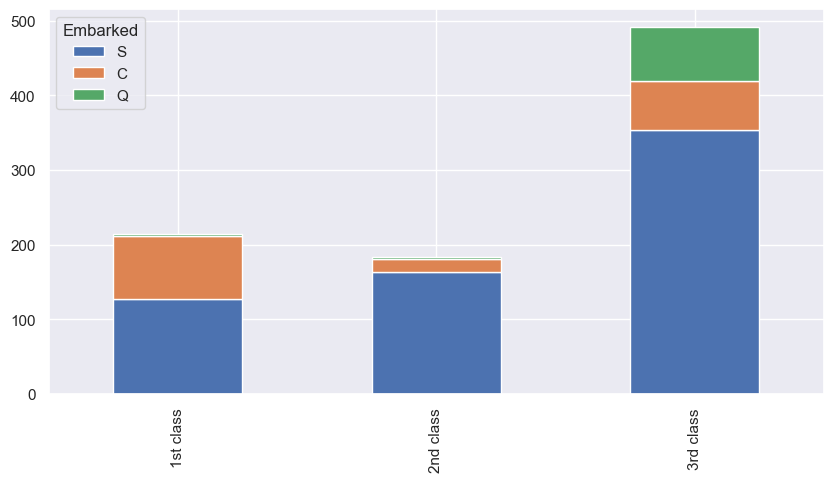

In [42]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [43]:
dataset.isna().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [44]:
dataset.iloc[:3]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,3.0,0,0,240276,9.6875,NaN,Q,0


In [45]:
# 특정 문자 포함 행만 선택하여 출력
dataset[dataset['Embarked'].str.contains('S')]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1,893,3,1,3.0,1,0,363272,7.0000,NaN,S,2
3,895,3,0,2.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,1.0,1,1,3101298,12.2875,NaN,S,2
5,897,3,0,0.0,0,0,7538,9.2250,NaN,S,0
7,899,2,0,1.0,1,1,248738,29.0000,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
409,1301,3,1,0.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,1
412,1304,3,1,2.0,0,0,347086,7.7750,NaN,S,1
413,1305,3,0,2.0,0,0,A.5. 3236,8.0500,NaN,S,0
415,1307,3,0,3.0,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0


In [46]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [47]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

- 승착장(Embarked) 위치를 숫자화 시킨 결과 확인

In [48]:
dataset.iloc[:3]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,2,0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,0,2
2,894,2,0,3.0,0,0,240276,9.6875,NaN,2,0


#### 2.5 Fare 분석 및 가공

- 컬럼 값에 Na가 있는지 확인하고,
- Na값을 median 값으로 채우기로 조치
- median 값은 상관관계가 높은 Pclass 등급별 평균을 구하여 채우기 함.

In [49]:
# 값이 0이 아닌 열만 선택하여 출력
train.isna().sum()[train.isna().sum() != 0] , test.isna().sum() [test.isna().sum() != 0]

(Cabin    687
 dtype: int64,
 Fare       1
 Cabin    327
 dtype: int64)

In [50]:
# fill missing Fare with median fare for each Pclass 
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(3) ,test.iloc[:3]

C:\Users\tedy0\AppData\Local\Temp\ipykernel_19580\2416790413.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
C:\Users\tedy0\AppData\Local\Temp\ipykernel_19580\2416790413.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

(   PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
 0            1         0       3    0  1.0      1      0         A/5 21171   
 1            2         1       1    1  3.0      1      0          PC 17599   
 2            3         1       3    1  1.0      0      0  STON/O2. 3101282   
 
       Fare Cabin  Embarked  Title  
 0   7.2500   NaN         0      0  
 1  71.2833   C85         1      2  
 2   7.9250   NaN         0      1  ,
    PassengerId  Pclass  Sex  Age  SibSp  Parch  Ticket    Fare Cabin  \
 0          892       3    0  2.0      0      0  330911  7.8292   NaN   
 1          893       3    1  3.0      1      0  363272  7.0000   NaN   
 2          894       2    0  3.0      0      0  240276  9.6875   NaN   
 
    Embarked  Title  
 0         2      0  
 1         0      2  
 2         2      0  )

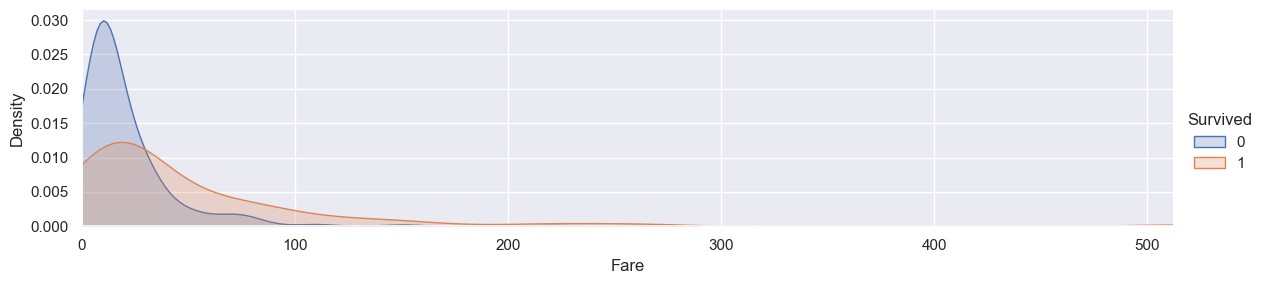

In [51]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',fill= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()  

- Fare 값 분류를 통한 Fare 값 숫자 단순화(0, 1, 2, 3) \
: 하기와 같이 수행하면 dataset, train, test 모두 반영됨. \
: train_test_data 는 반영안됨

In [52]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [53]:
dataset.iloc[:3] , train.iloc[:3] , test.iloc[:3]

(   PassengerId  Pclass  Sex  Age  SibSp  Parch  Ticket  Fare Cabin  Embarked  \
 0          892       3    0  2.0      0      0  330911   0.0   NaN         2   
 1          893       3    1  3.0      1      0  363272   0.0   NaN         0   
 2          894       2    0  3.0      0      0  240276   0.0   NaN         2   
 
    Title  
 0      0  
 1      2  
 2      0  ,
    PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
 0            1         0       3    0  1.0      1      0         A/5 21171   
 1            2         1       1    1  3.0      1      0          PC 17599   
 2            3         1       3    1  1.0      0      0  STON/O2. 3101282   
 
    Fare Cabin  Embarked  Title  
 0   0.0   NaN         0      0  
 1   2.0   C85         1      2  
 2   0.0   NaN         0      1  ,
    PassengerId  Pclass  Sex  Age  SibSp  Parch  Ticket  Fare Cabin  Embarked  \
 0          892       3    0  2.0      0      0  330911   0.0   NaN         2   
 1      

#### 2.6 Cabin 분석/가공
- na 값이 있는지 확인함

In [54]:

train.isna().sum()[train.isna().sum() != 0] , test.isna().sum()[test.isna().sum() != 0] , dataset.isna().sum()[dataset.isna().sum() != 0]

(Cabin    687
 dtype: int64,
 Cabin    327
 dtype: int64,
 Cabin    327
 dtype: int64)

In [55]:
#dataset.isna().sum()[dataset.isna().sum() ! = 0] # 느낌표 뒤에 스페이스 들어가면 에러남...
dataset.isna().sum()     [dataset.isna().sum()    != 0]  

Cabin    327
dtype: int64

- Cabin 데이터 중에 어떠한 값들이 있는지 확인

In [56]:
train.Cabin.value_counts() #, test.Cabin.value_counts()
# dataset.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

.str[:1]   : 이 부분은 .str 접근자를 사용하여 문자열 조작을 적용  \
[:1]   : 'Cabin' 열의 문자열 값에서 처음 한 문자만 남기고 나머지를 슬라이싱 \
 
(예시)  B96 --> B 만 남게됨

In [57]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

- 승객 등급별로 분류하고,  Cabin 이니셜을 승객 등급 분류에 따라 할당하여 그래프로 표시함

<Axes: >

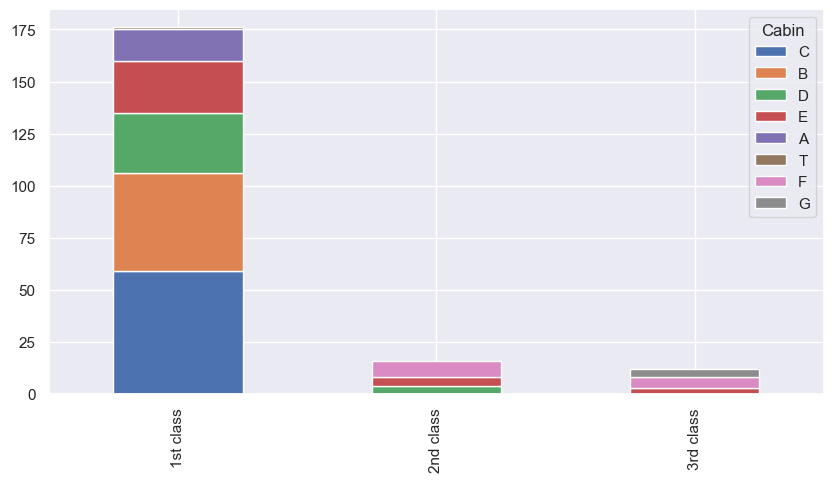

In [58]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

- Cabin 번호중 1등실 방번호 인원수 비율이 많은 순서 : C, B, D, E, A
- 2등실 방번호 G, T, F
- 3등식 방번호 T, F, G
- Cabin 방번호 이니셜 별로 숫자 부여에 대한 의미는 정확치 않음. 

In [59]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

- 승객 등급별 , Cabin 평균을 승객 등급에 해당하는 Cabin컬럼 중 Na값 대신 채움

In [60]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

C:\Users\tedy0\AppData\Local\Temp\ipykernel_19580\2600729139.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
C:\Users\tedy0\AppData\Local\Temp\ipykernel_19580\2600729139.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

#### 2.7 SibSp(Sibling and Spouse:형제자매,배우자) , Parch(Parent/chindren)
- 가족수(FamilySize)로 묶어서 분석
- SibSp + Parch + 1 하여 FamilySize 컬럼을 새로 생성함

In [61]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [62]:
train.iloc[:3]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,2
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,1


In [63]:
test.iloc[:3]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0,0,330911,0.0,2.0,2,0,1
1,893,3,1,3.0,1,0,363272,0.0,2.0,0,2,2
2,894,2,0,3.0,0,0,240276,0.0,2.0,2,0,1


- FamilySize를 X축으로 하는 밀집도 그래프를 생성

(0.0, 11.0)

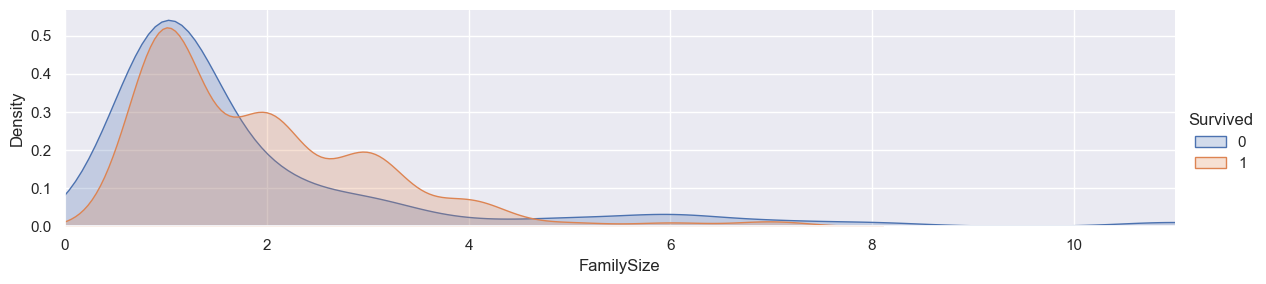

In [64]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',fill= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

- FamilySize 단계별로 0.4 씩 증가하는 숫자로 가공함.
- 이유는 가족 구성원 수가 많을수록 생존 가능성이 높다는 가정으로 전처리 과정임 (예: 서로 도움)
- 하지만, 가족 구성원 수와 생존 가능성 간의 관계가 반드시 선형적이라고 가정하지 않음.

In [65]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [66]:
train.iloc[:3]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0


#### 2.8 컬럼(Feauture)간 상관관계 분석으로 분석결과 확인하고 마무리함.
   : Feature Vector화(숫자화) 처리후 상관관계 분석하면 적절함.
- 하기 코드는 컬럼(feature)간 상호 연관성을 분석하여 수치로 나타내는 코드임
- train 데이터에는 survived 있고, 모든 데이터 중 number만 대상으로 하여 분석 진행함.
 - 데이터프레임에서 숫자형 데이터만 선택하도록 코드를 수정. 
 - 이를 통해 문자열 값을 부동 소수점 값으로 변환하는 오류를 피할 수 있음.
 - 숫자형 데이터만 선택하기 위해 select_dtypes 메서드를 사용. 
 - 그런 다음 상관관계를 계산하고, Survived와 상관관계가 높은 상위 40개의 열을 선택하여 히트맵을 그림

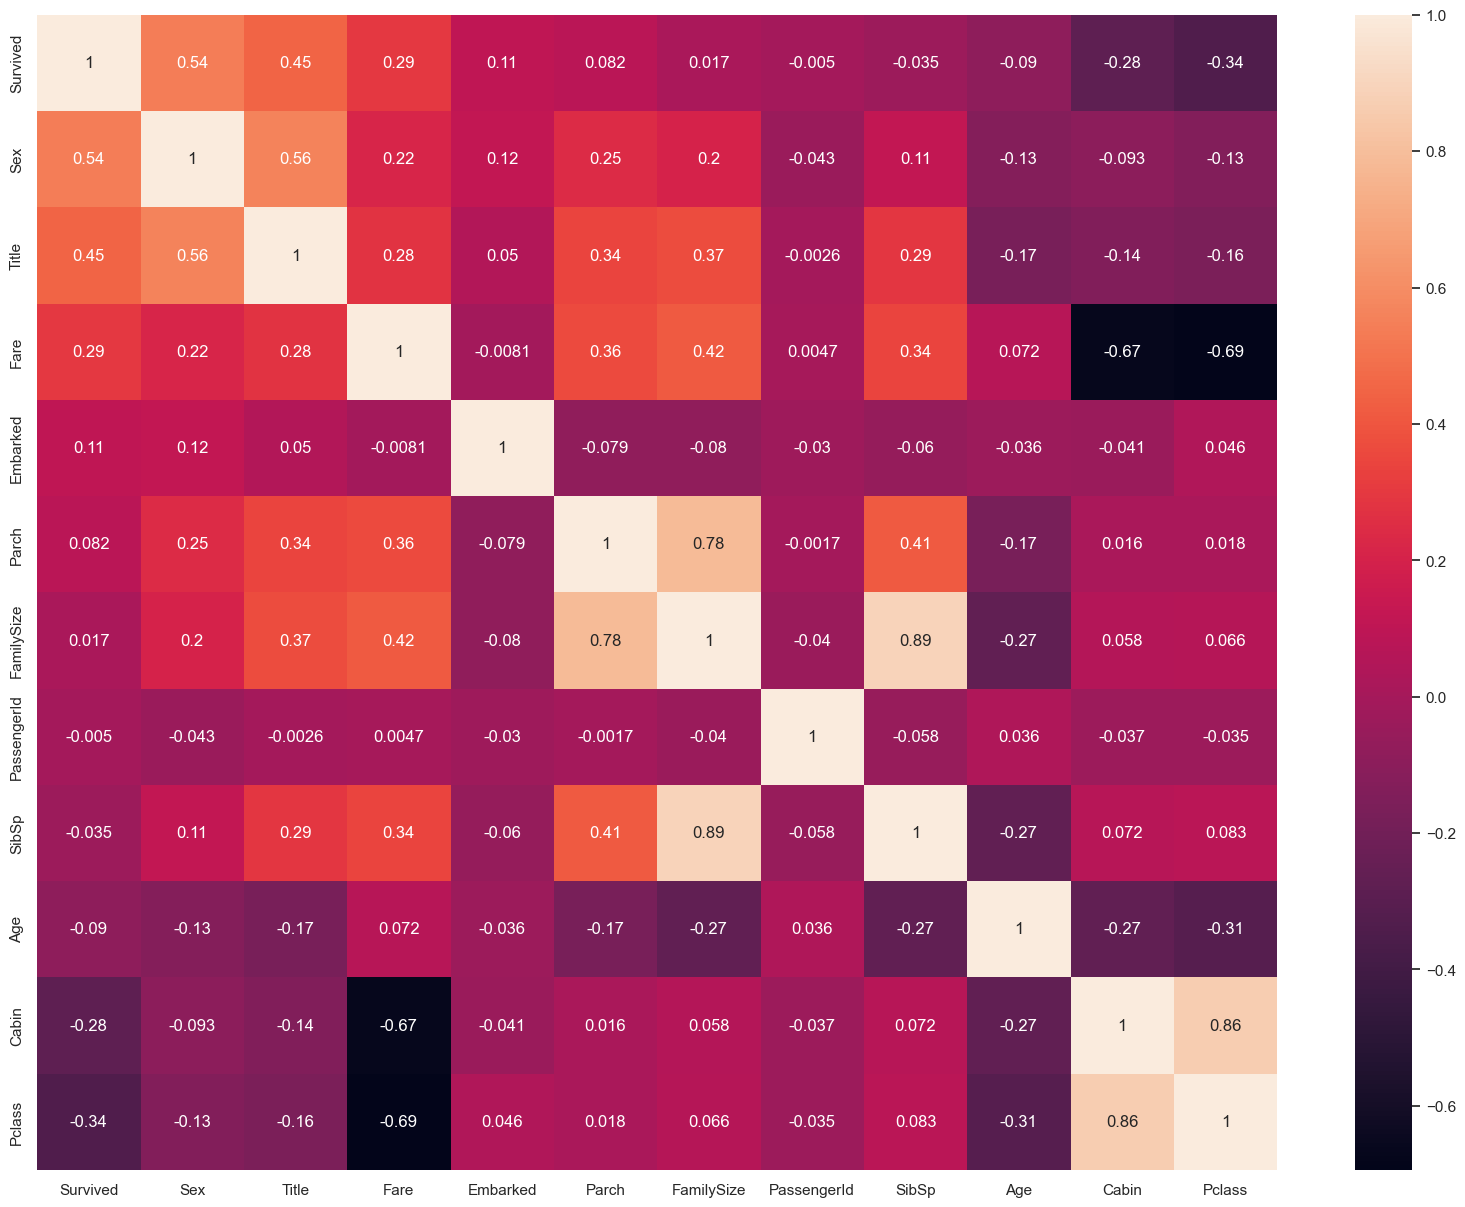

In [67]:
# import pandas as pd

# 숫자형 데이터만 선택
numeric_data = train.select_dtypes(include=['number'])

# 상관 관계 계산
corr = numeric_data.corr()

# 상관 관계가 높은 상위 40개의 열 선택 및 상관 관계 계산
top_corr = numeric_data[corr.nlargest(40, 'Survived')['Survived'].index].corr()

# 그래프 그리기
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(20, 15)
sns.heatmap(top_corr, annot=True, ax=ax1)
plt.show()

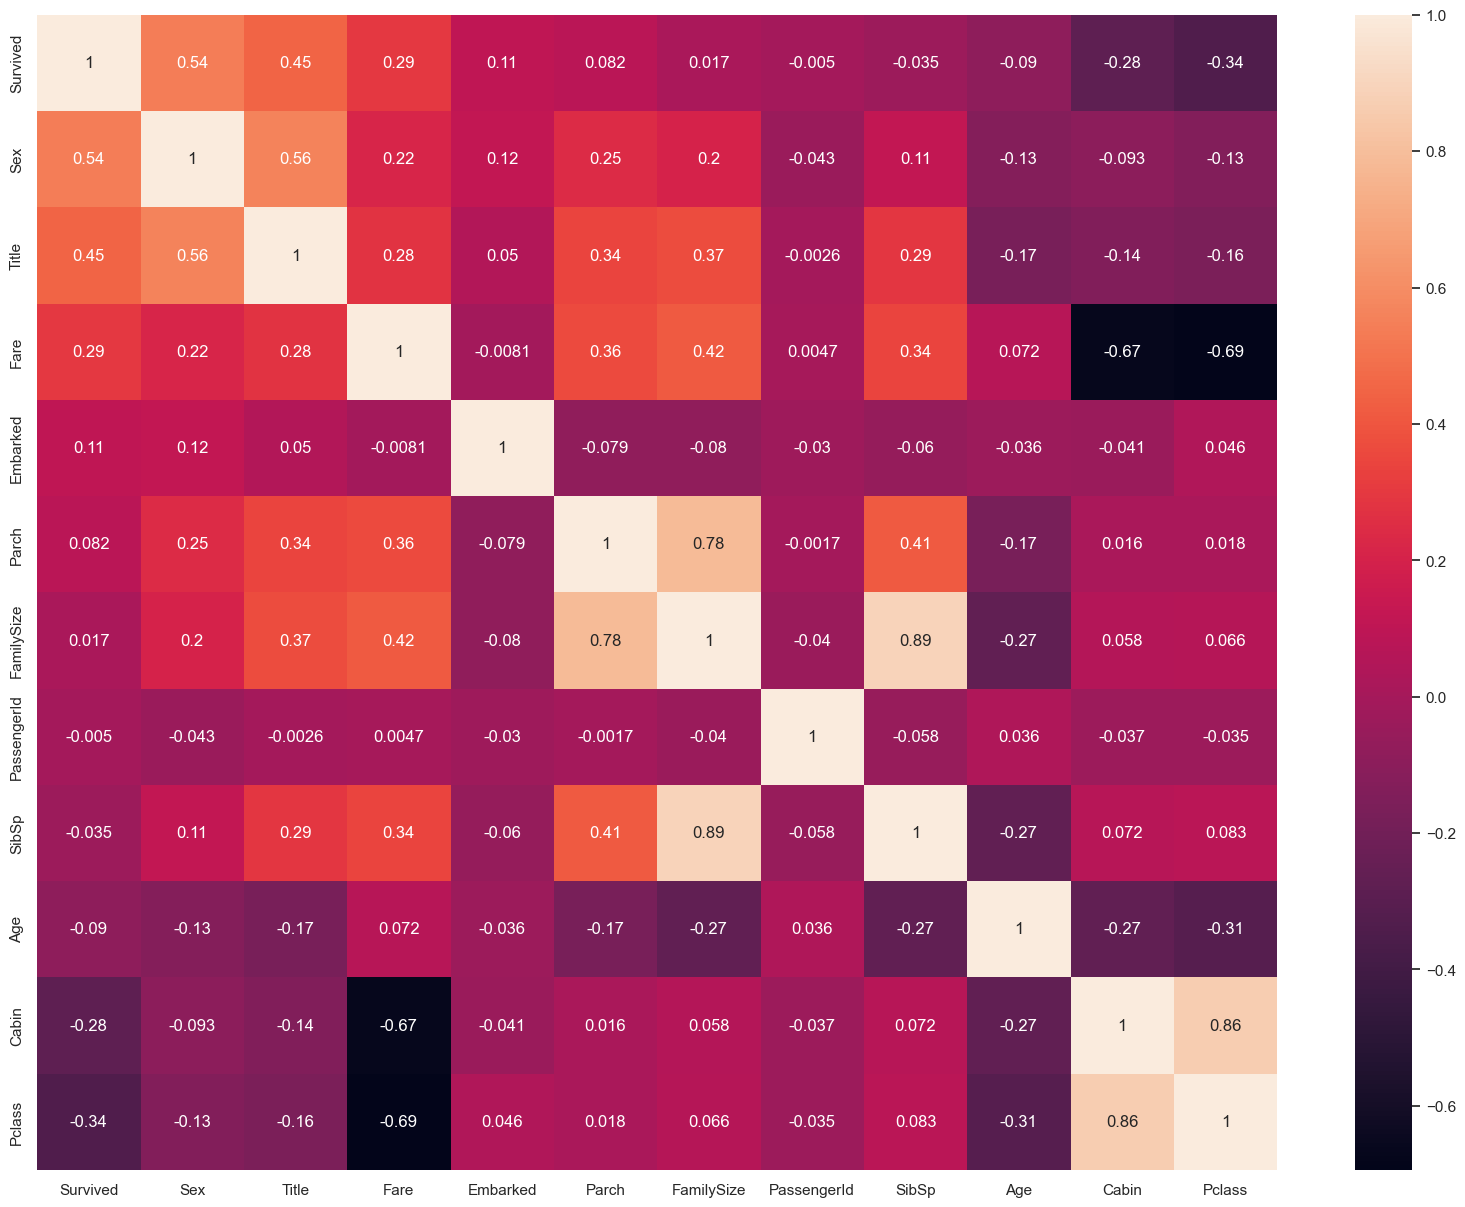

In [68]:

# import numpy as np

# 숫자형 데이터만 선택
numeric_data = train.select_dtypes(include=['number'])

# 상관 관계 계산
corr = numeric_data.corr()

# 상관 관계가 높은 상위 40개의 열 선택
top_corr_columns = corr.nlargest(40, 'Survived')['Survived'].index.to_list()
top_corr = numeric_data[top_corr_columns]

# 상관 관계 계수 계산 (corrcoef() 함수 사용)
corr_matrix = np.corrcoef(top_corr.values.T)

# 상관 관계 행렬 DataFrame으로 변환
corr_df = pd.DataFrame(corr_matrix, index=top_corr_columns, columns=top_corr_columns)

# 그래프 그리기
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(20, 15)
sns.heatmap(corr_df, annot=True, ax=ax1)
plt.show()


#### 2.9 마지막 가공
- Feature(컬럼) 값 숫자화 시킨후 , 불필요 Feature(컬럼) 삭제

In [69]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [70]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']
# train_data에서 Survived 컬럼(열)을 삭제하고, target 변수에 별도로 Survived 값을 저장하게함.
train_data.shape, target.shape
# 이걸 실행하면, 행(고객수)는 891개이고, 첫번째 결과의 열의 갯수가 8, 두번째 결과는 1개(Survived)

((891, 8), (891,))

In [71]:
train.head(2)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,1,3.0,2.0,0.8,1,2,0.4


### 3. 모델 디자인 


In [72]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

#### 3.1 K-Fold cross validation 정의 
n_splits=10: 훈련 데이터를 10개의 폴드로 분할. 즉, 학습 폴드 9개와 validation 폴드 1개가 생성. \
(1) 학습 폴더 데이터로 fitting 한 결과를 Validation 폴더 데이타에 맞추어 정확도를 계산함 \
(2) Validation 폴더 데이터는 선택시 정해지는 편향성으로 정확도 계산 자체가 편향적일수있음. \
(3) 그래서 Val 폴더 데이터를 최초 10개로 분할한 훈련데이터에서 10번을 바꿔서 사용하여 데이터 편향성을 제거 \
(4) 10개의 val 폴더를 이용한 학습 정확도 10개를 평균 하여 사용하게 함.
   
shuffle=True: 폴드를 만들 때 데이터를 셔플합니다. 이는 각 폴드에 다양한 데이터가 포함되도록 하기 위해서입니다. \
random_state=0: 셔플링 과정을 위한 난수 시드를 설정합니다. 이 값을 설정하면 셔플링 결과가 동일하게 재현됩니다.

- KFold를 사용하는 이유:

  : 교차 검증은 모델의 과적합(overfitting)을 방지 \
  : 과적합은 모델이 학습 데이터에 너무 잘 맞춰져 새로운 데이터에 대한 일반화 능력이 떨어지는 경우를 말함 \
  : K-Fold는 모델의 성능을 다양한 데이터 폴드에서 평가하여 더 정확한 평가 결과를 제공 \
  : K-Fold는 여러 모델을 비교하고 최적의 모델을 선택하는 데 유용

In [73]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

#### 3.2 모델
- KNeighborsClassifier (kNN) \
: 예측하고자 하는 값의 이웃값(주변값)의 해당값이 무엇이 더 많은가에 의해 결정되는 모델 \
: 예측하고자 하는 대상의 이웃값이 생존자가 많은지 사망자가 많은지 분류하여 결정하는 모델방법론 
- taget의 용도 \
   : 교차 검증 과정에서 target은 학습 셋과 테스트 셋에서 각각 사용 \
   : 학습 셋에서는 모델을 학습시키고, \
   : 테스트 셋에서는 모델의 예측과 실제 레이블(target)을 비교하여 성능을 평가

In [74]:
clf = KNeighborsClassifier(n_neighbors = 5)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.78888889 0.83146067 0.84269663 0.78651685 0.86516854 0.82022472
 0.82022472 0.80898876 0.7752809  0.85393258]


- KNeighborsClassifier ... kNN Score(위의 결과 평균)
- kfold split 가 10 이므로 평균값을 10개가 나온거임

In [75]:
# kNN Score
round(np.mean(score)*100, 2)

81.93

- DecisionTreeClassifier \
: (1) 남자/여자 , (2) 가족(형제자매) 유무 , (3) 1등급 여부 , (4) 자식 유무 .. \
: 각 단계별로 생존을 확인해서 결정하는 트리 결정 구조

In [76]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.80898876 0.78651685 0.7752809  0.87640449 0.75280899
 0.83146067 0.82022472 0.74157303 0.78651685]


- DecisionTreeClassifier... decision tree Score(평균)

In [77]:
# decision tree Score
round(np.mean(score)*100, 2)

79.46

- RandomForestClassifier  ... Random Forest Score(평균) \
  : DecissionTree 구조를 여러개의 작은(깊이가 낮은) 트리구조로 형성하는것
  
- (예시) feature가 12개 있다고 가정시, 트리구조를 3개로 설정한다면, 트리구조당 Feature 4개씩 할당하여 \
  죽었나 살았나를 3개의 트리구조에서 각각 결정하고 \
  3개의 트리구조 결과값인 생/사가 많은 것으로 결론을 도출하는 방식    

In [78]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.78888889 0.86516854 0.82022472 0.79775281 0.87640449 0.78651685
 0.83146067 0.78651685 0.76404494 0.79775281]


In [79]:
# Random Forest Score
round(np.mean(score)*100, 2)

81.15

- GaussianNB  .... Naive Bayes Score(평균) \
  : 확률을 이용하는 것이며,예를 들어 늙은 남자의 생존 확률을 확률 공식에 대입하여 구하는 방식

In [80]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]


In [81]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

78.78

- 그외 SVM (Support Vector Machine) ... \
   : 'Decision 바운더리' 라는 선을 찾아내서 생존 과 사망을 결정하는 방식 \
   : 훈련데이타, 테스트 데이타를 이용하여 데이터의 경계값을 찾는 방식

In [82]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.79775281 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.84269663 0.86516854]


In [83]:
# SVM ( Support Vector Machine)
round(np.mean(score)*100, 2)

83.5

### 4. 모델 선정과 훈련 Testing
- 훈련(모델 fit)

In [84]:
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(train_data, target)   # target : 학습데이터의 결과를 담고 있는 데이터( Survived 값)

KNeighborsClassifier()

### 5. 예측 ( Prediction ) 수행과 Submission 파일 제출

- test 데이터프레임에서 "PassengerId" 열을 제거하고 복사본을 새로운 변수 test_data에 저장함.
- 복사본 test_data로 훈련된 모델 clf(KNeighborsClassifier)에 넣어 predict 함수로 예측값을 생성함 \ 
   : 모델 훈련시 담은 결과 target 이 Survived 값이므로, \
   : test_data를 predict 하면 결과값이 survived 이 나오게 되며, prediction 변수에 저장함.

In [85]:
test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)                  # 

- submission 파일 만들기 (submission.csv)

In [86]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [87]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [88]:
test_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,2.0,0.0,2.0,2,0,0.0
1,3,1,3.0,0.0,2.0,0,2,0.4
2,2,0,3.0,0.0,2.0,2,0,0.0
3,3,0,2.0,0.0,2.0,0,0,0.0
4,3,1,1.0,0.0,2.0,0,2,0.8


In [89]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0
